# Quantile Regression

The NAG function [`correg.quantile_linreg_easy`](https://www.nag.com/numeric/py/nagdoc_latest/naginterfaces.library.correg.html#naginterfaces.library.correg.quantile_linreg_easy) can be used to model the conditional $\tau$-th quantile of a dependent variable against one or more independent or explanatory variables.

Whereas the method of least squares results in estimates of the conditional <em>mean</em> of the response (dependent)  variable, quantile regression gives estimates of the conditional <em>median</em> (or any other quantile) of the response variable.

In our example below the dependent variable is household food expenditure, which is regressed against household income. The data is from a study of 1857 by Ernst Engel and is loaded from the `csv` file `engel.csv`.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('engel.csv')
df.head()

,income,expenditure
0,420.1577,255.8394
1,541.4117,310.9587
2,901.1575,485.6800
3,639.0802,402.9974
4,750.8756,495.5608


In the design matrix for the regression we include an intercept term by augmenting the income data set with a column of ones

In [3]:
income_X = [[1., incomei] for incomei in df['income']]

Our quantiles of interest

In [4]:
tau = [0.1, 0.5, 0.9]

Compute the regression

In [5]:
from naginterfaces.library import correg
regn = correg.quantile_linreg_easy(income_X, df['expenditure'], tau)

The regression coefficients are returned in attribute `b` of the function's return tuple.

For the plot, compute the regression lines

In [6]:
import numpy as np
plot_x = np.linspace(0, max(df['income']))
plot_ys = [regn.b[0, i] + regn.b[1, i]*plot_x for i in range(len(tau))]

Make a scatter plot of the original income data (without the intercept) and add in the regression lines

<IPython.core.display.Javascript object>


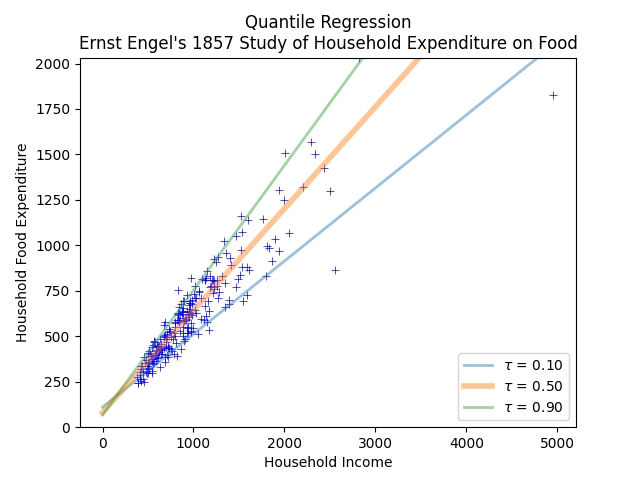

In [7]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('nbagg')
plt.scatter(df['income'], df['expenditure'], c='blue', marker='+', linewidth=0.5)
for tau_i, tau_val in enumerate(tau):
    plt.plot(
        plot_x, plot_ys[tau_i],
        label=r'$\tau$ = {:.2f}'.format(tau_val),
        linewidth=(4 if tau_val == 0.5 else 2),
        alpha=0.45,
    )
plt.ylim((0., max(df['expenditure'])))
plt.xlabel('Household Income')
plt.ylabel('Household Food Expenditure')
plt.legend(loc='lower right')
plt.title(
    'Quantile Regression\n'
    'Ernst Engel\'s 1857 Study of Household Expenditure on Food'
)
plt.show()